In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import r2_score
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
dataset_path = os.path.join('../datasets/austin_housing/')
file_name = 'processed_austin_housing.csv'
df_austin = pd.read_csv(dataset_path+file_name)

df_austin

,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasGarage,hasSpa,hasView,homeType,...,numOfWindowFeatures,lotSizeSqFt,livingAreaSqFt,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
0,-4.019137,1.433803,1.362892,-0.265248,0.570097,0.945895,0.904299,-0.292941,-0.543043,0.183428,...,1.620901,-0.851823,0.399818,-0.535249,-1.673595,-0.533854,-0.492151,0.300632,0.658444,2
1,-4.019137,1.454849,1.379193,-0.265248,0.570097,0.945895,0.904299,-0.292941,-0.543043,0.183428,...,-0.426958,-0.732281,-0.422348,-0.410445,-1.673595,-0.533854,-0.492151,-0.647765,0.658444,1
2,-4.019137,1.218441,1.638033,-0.265248,-0.909113,0.945895,-1.105829,-0.292941,-0.543043,0.183428,...,-0.426958,0.404743,-0.708576,-0.597651,-1.494404,-0.396030,-0.492151,-0.647765,-0.518146,1
3,-4.019137,1.449066,1.379644,-0.265248,0.570097,0.945895,0.904299,-0.292941,-0.543043,0.183428,...,-0.426958,-0.792052,-0.511177,-0.410445,-1.673595,-0.533854,-0.492151,-0.647765,-0.518146,1
4,-4.019137,1.503275,1.436293,-0.265248,-0.909113,0.945895,-1.105829,-0.292941,-0.543043,0.183428,...,-0.426958,-0.372968,-0.063082,-0.660053,-0.956832,-0.043812,-0.492151,0.300632,-0.518146,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15166,0.638709,-1.336489,-0.446376,-0.265248,3.528518,-1.057200,0.904299,-0.292941,1.841474,0.183428,...,-0.426958,-0.492510,-0.949402,-0.878460,-1.315213,0.571804,-0.492151,-0.647765,-0.518146,1
15167,0.268199,-0.529784,0.067251,-0.265248,0.570097,0.945895,0.904299,3.413656,1.841474,0.183428,...,-0.426958,-3.305873,-0.303909,0.057571,0.476695,-0.034623,0.656087,1.249029,-0.518146,3
15168,-1.690214,-0.482223,0.205497,-0.265248,0.570097,-1.057200,0.904299,-0.292941,-0.543043,0.183428,...,-0.426958,0.704286,-0.663174,-0.972063,-0.419259,-1.066775,-1.066270,0.300632,-0.518146,2
15169,-0.737473,-0.103408,0.717053,-0.265248,-0.909113,-1.057200,-1.105829,-0.292941,-0.543043,-3.293970,...,-0.426958,-0.792052,3.821723,-0.504048,0.476695,-0.552230,0.081968,-0.647765,0.658444,1


In [4]:
X = df_austin.drop(['latestPrice'], axis = 1)
y = df_austin['latestPrice']

In [5]:
from sklearn.linear_model import ElasticNetCV, ElasticNet

cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        precompute='auto', max_iter=2500, tol=0.0001, cv=5, copy_X=True, verbose=0, n_jobs=-1, positive=False, 
                        random_state=42, selection='cyclic')

cv_model.fit(X, y)

ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 1],
             max_iter=2500, n_jobs=-1, random_state=42)

In [6]:
print('Optimal alpha: %.8f'%cv_model.alpha_)
print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
print('Number of iterations %d'%cv_model.n_iter_)

Optimal alpha: 0.00059911
Optimal l1_ratio: 1.000
Number of iterations 58


In [7]:
model = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, random_state=42)
model.fit(X, y)

ElasticNet(alpha=0.0005991106764341676, l1_ratio=1.0, max_iter=58,
           random_state=42)

In [8]:
print(r2_score(y, model.predict(X)))

0.5037406705982113


26 features, reduction of 3.70%


Text(0.5, 1.0, 'Feature Weights for Austin Housing Dataset')

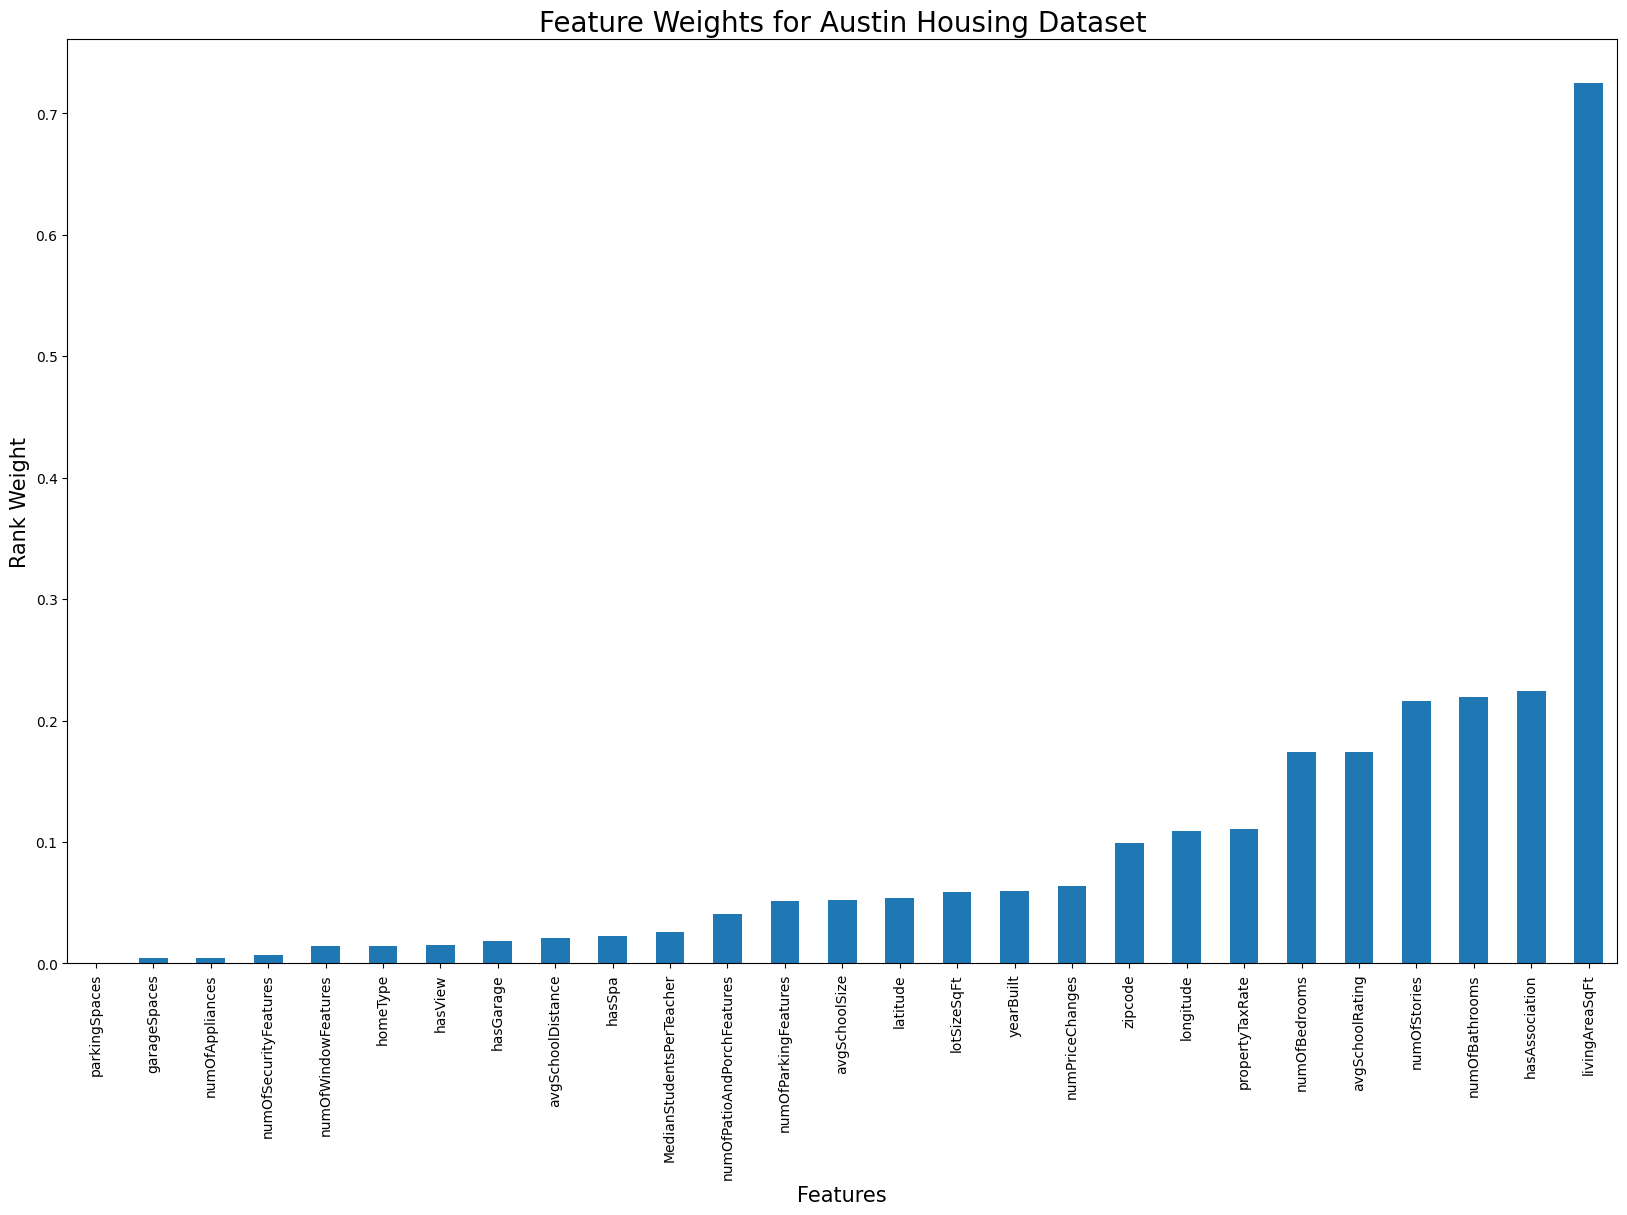

In [14]:
feature_importance = pd.Series(index = X.columns, data = np.abs(model.coef_))

n_selected_features = (feature_importance>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))

feature_importance.sort_values().tail(30).plot(kind = 'bar', figsize = (20,12))
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Rank Weight', fontsize = 15)
plt.title('Feature Weights for Austin Housing Dataset', fontsize = 20)